# Income inequality: Belgium and Colombia
**Last edit:** May 18, 2019

We study the case of Belgium and Colombia with respect income inequality. We use [this](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2652960/) article to derive the measures of income inequality.

**Datsets and references:**
- Income shares by deciles: http://iresearch.worldbank.org/PovcalNet/povOnDemand.aspx
- Income inequality measures. (2007). *Journal of Epidemiology and Community Health, 61*(10), 849–852. http://doi.org/10.1136/jech.2006.052969

## Import libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Gini Coefficient
We begin by importing the data and cleaning it. The data comes from the World Bank's [PovcalNet portal](http://iresearch.worldbank.org/PovcalNet/povOnDemand.aspx). The most relevant data is at the very bottom of the text file for [Belgium](http://iresearch.worldbank.org/PovcalNet/Detail.aspx?Format=Detail&C0=BEL_3&PPP0=0.879014&PL0=1.90&Y0=2015&NumOfCountries=1) and [Colombia](http://iresearch.worldbank.org/PovcalNet/Detail.aspx?Format=Detail&C0=COL_3&PPP0=1196.95&PL0=1.90&Y0=2016&NumOfCountries=1).

In [2]:
def text_file_to_list (path):
    '''Converts a text file into a list which is then cleaned'''
    with open(path) as file:
        next(file)
        line = file.readline().split()
        line.insert(0, 0)
    return [float(item) for item in line]
    
    file.close()

Having defined a function above that goes through the last few rows, cleans the data and then outputs a list of floats with the income share by deciles; we calculate the cumulative sum for each country.

In [3]:
bel_income_deciles = text_file_to_list('Data/002/belgium_income_distribution_2015.txt')
col_income_deciles = text_file_to_list('Data/002/colombia_income_distribution_2016.txt')

bel_cumulative_income_deciles = np.cumsum(bel_income_deciles)
col_cumulative_income_deciles = np.cumsum(col_income_deciles)

We create a DataFrame with the data so that it's easier to analyse and plot. Already, we can see how the tenth decile (i.e. the highest income bracket) in Colombia has a larger share of income than the same decile in Belgium.

In [4]:
income_deciles = pd.DataFrame({
    'belgium_income_%':bel_income_deciles,
    'colombia_income_%':col_income_deciles,
    'belgium_cumulative_income_%': bel_cumulative_income_deciles,
    'colombia_cumulative_income_%': col_cumulative_income_deciles,
    'cumulative_household_%': np.arange(0,110,step=10)
})

income_deciles

,belgium_cumulative_income_%,belgium_income_%,colombia_cumulative_income_%,colombia_income_%,cumulative_household_%
0,0.0000,0.0000,0.0000,0.0000,0
1,3.4350,3.4350,1.2948,1.2948,10
2,8.6193,5.1843,3.8604,2.5656,20
3,15.0998,6.4805,7.3791,3.5187,30
4,22.6515,7.5517,11.8747,4.4956,40
5,31.2179,8.5664,17.4860,5.6113,50
6,40.7417,9.5238,24.4411,6.9551,60
7,51.3937,10.6520,33.1309,8.6898,70
8,63.4837,12.0900,44.3029,11.1720,80
9,77.7977,14.3140,59.9649,15.6620,90


Plotting the [Lorenz Curve](https://en.wikipedia.org/wiki/Gini_coefficient) for both countries. We observe that Colombia has a higher degree of income inequality than Belgium since it is further away from the line of equality.

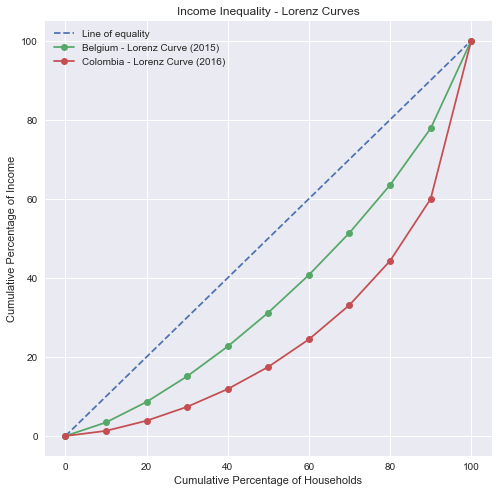

In [5]:
plt.figure(figsize=(8,8))

plt.plot(range(100), '--')
plt.plot(income_deciles['cumulative_household_%'], income_deciles['belgium_cumulative_income_%'], '-o')
plt.plot(income_deciles['cumulative_household_%'], income_deciles['colombia_cumulative_income_%'], '-o')

plt.xlabel('Cumulative Percentage of Households')
plt.ylabel('Cumulative Percentage of Income')
plt.title('Income Inequality - Lorenz Curves')
plt.legend(['Line of equality', 'Belgium - Lorenz Curve (2015)', 'Colombia - Lorenz Curve (2016)']);

We use the following formula to [approximate](https://en.wikipedia.org/wiki/Gini_coefficient#Other_approaches) the Gini Coefficient since only values at certain intervals (deciles) are known:

$$
G = 1 - \sum_{k=1}^{n}  = (X_k - X_{k-1})(Y_k + Y_{k-1})
$$

Where $k$ is the number of intervals known (10 in our case), $X$ is the ascending cumulative percentage of households and $Y$ is the ascending cumulative share of income by interval.

In [6]:
def gini_coefficient(cumulative_household, cumulative_income):
    '''Calculates an approximation of the Gini coefficient given a list of income sharees by k intervals of the population'''
    X = cumulative_household / 100
    Y = cumulative_income / 100
    
    G = 1 - sum([(X[k] - X[k-1]) * (Y[k] + Y[k-1]) for k in range(1, len(cumulative_household))])
    
    return G

Using the function above, we derive the Gini coefficientes for each country. We check that they are close to the ones provided by the original dataset.

In [7]:
bel_gini = gini_coefficient(income_deciles['cumulative_household_%'], income_deciles['belgium_cumulative_income_%'])
col_gini = gini_coefficient(income_deciles['cumulative_household_%'], income_deciles['colombia_cumulative_income_%'])

print('Belgium Gini Coefficient (approx.):', bel_gini)
print('Colombia Gini Coefficient (approx.):', col_gini)

Belgium Gini Coefficient (approx.): 0.2711187
Colombia Gini Coefficient (approx.): 0.4925305


**Conclusions:**

- Our analysis yields an approximate Gini coefficient for Belgium of ```27.1``` and of ```49.25``` for Colombia. This evidence would indicate that Colombia is more unequal than Belgium. 
- The Lorenz Curves of each country reveal a similar finding. Although both countries lie away from the line of perfect equality, Belgium is much closer, suggesting that it has a higher level of income equality than Colombia.

## Next steps...
As per the [article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2652960/) mentioned in this Jupyter Notebook, the next steps would be to perform a similar analysis using different measures of inequality such as:
- Atkinson index
- Coefficient of variation (CV)
- Decile ratios
- Generalised entropy (GE) index
- Kakwani progressivity index
- Proportion of total income earned
- Robin Hood index
- Sen poverty measure

Furthermore, it would be interesting to gather data on more countries and create an interactive dashboard with the findings.